# Duration Prediction

## Purpose
Taxi Data Prediction

## Notebook
#### module_1_2_nyc_taxi_analysis.ipynb
- Data Scrapping
- Data Fomart
- Feature Engineering
- Training
- Experiment Tracking

## Methodology
- Pandas
- Numpy
- scikit-learn
- MLFlow

## Versioning
- Conda (Notebook Versioning Packages)

## Notable TODOs:
--

## Results:
RSME: 5.766549051507733

## Suggested next steps:
--

# Setup

### System Infomation

In [1]:
%%bash
# Variables
BASE_ENV_PATH=$(conda info -a |\
                grep -i "CONDA_ROOT" |\
                cut -d ":" -f 2 |\
                xargs echo |\
                sed 's/ *$//g')
JUPY_PATH="$BASE_ENV_PATH/bin/jupyter"
JUPYLAB_VER=$(echo $($JUPY_PATH lab --version))

## System Info
printf "## GLOBAL INFO"
# System Python Version
printf "\nConda Python Version: "
conda info | grep -i "python version" | cut -d ":" -f 2
# Conda Base
printf "Conda Base Path: $BASE_ENV_PATH"
# Jupyter Lab Version
printf "\nJupyter Lab Version: $JUPYLAB_VER"
# Jupyter Lab Extensions
printf "\nEnabled Extensions:"
echo ''
echo $($JUPY_PATH labextension list)

## Environment Info
printf "## ENVIRONMENT INFO"
# Python Env Path
printf "\nEnvironment Python Version: "
python --version||
# Python Env Path
printf "Environment Python Path: "
which python
# Active Mamba Environment
printf "Active Environment: "
conda info -a | grep -i "active environment" | cut -d ":" -f 2

## GLOBAL INFO
Conda Python Version:  3.10.9.final.0
Conda Base Path: /home/leobit/miniconda3
Jupyter Lab Version: 3.5.3
Enabled Extensions:


Config option `kernel_spec_manager_class` not recognized by `ListLabExtensionsApp`.
[W 2023-06-18 15:41:01.679 LabApp] Config option `kernel_spec_manager_class` not recognized by `LabApp`.
JupyterLab v3.5.3
/home/leobit/miniconda3/share/jupyter/labextensions
        jupyterlab_templates v0.4.0 enabled  X (python, jupyterlab_templates)
        jupyterlab-system-monitor v0.8.0 enabled OK (python, jupyterlab-system-monitor)
        jupyterlab-execute-time v2.3.1 enabled OK (python, jupyterlab_execute_time)
        nbdime-jupyterlab v2.1.1 enabled OK
        jupyterlab-topbar-extension v0.6.1 enabled OK (python, jupyterlab-topbar)
        @krassowski/jupyterlab-lsp v3.10.2 enabled OK (python, jupyterlab-lsp)
        @lckr/jupyterlab_variableinspector v3.0.9 enabled OK (python, lckr_jupyterlab_variableinspector)
        @jupyterlab/git v0.41.0 enabled OK (python, jupyterlab-git)
        @jupyter-widgets/jupyterlab-manager v3.0.0 enabled OK (python, jupyterlab_widgets)
        @jupyter-serve


## ENVIRONMENT INFO
Environment Python Version: Python 3.10.11
/home/leobit/miniconda3/envs/cond_mlopszoomcamp_env/bin/python
Active Environment:  cond_mlopszoomcamp_env


### Path

In [3]:
import sys
from pathlib import Path

project_paths = ['data', 'notebook', 'scripts', 'model', 'src', 'pipeline']

B_PATH = Path.cwd().parents[0]

# Create Project Folders and Set Paths
for _path in project_paths:
    (B_PATH / _path).mkdir(exist_ok=True)
    if not globals().get(f"{_path[:1]}_path".upper()):
        globals()[f"{_path[:1]}_path".upper()] = B_PATH / _path
    else:
        globals()[f"{_path}_path"] = B_PATH / _path

# Custom Paths
RAW_DT_PATH = D_PATH / 'raw'
IMG_DT_PATH = D_PATH / 'images'
ASSETS_PATH = B_PATH / 'assets'

# Script Path
sys.path.append(S_PATH.as_posix())

### Installation

In [1]:
%%bash
mamba install pandas
mamba install -y fastparquet
pip install sweetviz
mamba install -y pyarrow
mamba install -y seaborn
mamba install -y scikit-learn
mamba install -y mlflow
mamba install xgboost
pip install hyperopt
mamba install -c conda-forge optuna


Looking for: ['pandas']


Pinned packages:
  - python 3.10.*


Transaction

  Prefix: /home/leobit/miniconda3/envs/cond_mlopszoomcamp_env

  All requested packages already installed


Looking for: ['fastparquet']

pkgs/main/linux-64                                          Using cache
pkgs/main/noarch                                            Using cache
pkgs/r/linux-64                                             Using cache
pkgs/r/noarch                                               Using cache

Pinned packages:
  - python 3.10.*


Transaction

  Prefix: /home/leobit/miniconda3/envs/cond_mlopszoomcamp_env

  Updating specs:

   - fastparquet
   - ca-certificates
   - certifi
   - openssl


  Package         Version  Build            Channel                 Size
──────────────────────────────────────────────────────────────────────────
  Install:
──────────────────────────────────────────────────────────────────────────

  + cramjam         2.6.2  py310h52d8a92_0  pkgs/main/linux-64 

In [34]:
%%bash
mamba install -y openpyxl


Looking for: ['openpyxl']


Pinned packages:
  - python 3.10.*


Transaction

  Prefix: /home/leobit/miniconda3/envs/cond_mlopszoomcamp_env

  Updating specs:

   - openpyxl
   - ca-certificates
   - certifi
   - openssl


  Package       Version  Build            Channel                  Size
─────────────────────────────────────────────────────────────────────────
  Install:
─────────────────────────────────────────────────────────────────────────

  + et_xmlfile    1.1.0  py310h06a4308_0  pkgs/main/linux-64     Cached
  + openpyxl     3.0.10  py310h5eee18b_0  pkgs/main/linux-64     Cached

  Summary:

  Install: 2 packages

  Total download: 0 B

─────────────────────────────────────────────────────────────────────────




Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


### Import

In [64]:
import re
import time
import random
import warnings
import mlflow
import pandas as pd
import pickle as pkl
import pandas as pd
import numpy as np
import multiprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from utils import save_obj, load_obj, run_api
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

### Configuration

In [5]:
# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

# Pandas
pd.set_option('max_colwidth', 999)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


# Future Warning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# # Torch Version
# print(f"Torch Version: {torch. __version__}")

# # Torch Cuda Available
# torch.cuda.is_available()

In [7]:
# MLFlow API Run
MLFLOW_SQL_PATH = f"sqlite:///{M_PATH.as_posix()}/mlflow.db"
cmd = f"mlflow ui --backend-store-uri {MLFLOW_SQL_PATH}"
run_api(cmd)

[2023-06-03 18:22:24 -0300] [403229] [INFO] Starting gunicorn 20.1.0

[2023-06-03 18:22:24 -0300] [403229] [INFO] Listening at: http://127.0.0.1:5000 (403229)

[2023-06-03 18:22:24 -0300] [403229] [INFO] Using worker: sync

[2023-06-03 18:22:24 -0300] [403232] [INFO] Booting worker with pid: 403232

[2023-06-03 18:22:24 -0300] [403247] [INFO] Booting worker with pid: 403247

[2023-06-03 18:22:24 -0300] [403252] [INFO] Booting worker with pid: 403252

[2023-06-03 18:22:24 -0300] [403257] [INFO] Booting worker with pid: 403257



In [9]:
# MLFLow Experiment Set
mlflow.set_tracking_uri(MLFLOW_SQL_PATH)
mlflow.set_experiment("nyc-taxi-experiment")

<Experiment: artifact_location='/home/leobit/Development/mlopszoomcamp/notebook/mlruns/1', creation_time=1684697666438, experiment_id='1', last_update_time=1684697666438, lifecycle_stage='active', name='nyc-taxi-experiment', tags={}>

# Data Wrangling

In [29]:
ytjan_df = pd.read_parquet(D_PATH / 'yellow_tripdata_2022-01.parquet')

In [30]:
ytjan_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.00000,3.80000,1.00000,N,142,236,1,14.50000,3.00000,0.50000,3.65000,0.00000,0.30000,21.95000,2.50000,0.00000
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.00000,2.10000,1.00000,N,236,42,1,8.00000,0.50000,0.50000,4.00000,0.00000,0.30000,13.30000,0.00000,0.00000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.00000,0.97000,1.00000,N,166,166,1,7.50000,0.50000,0.50000,1.76000,0.00000,0.30000,10.56000,0.00000,0.00000
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.00000,1.09000,1.00000,N,114,68,2,8.00000,0.50000,0.50000,0.00000,0.00000,0.30000,11.80000,2.50000,0.00000
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.00000,4.30000,1.00000,N,68,163,1,23.50000,0.50000,0.50000,3.00000,0.00000,0.30000,30.30000,2.50000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32000,NaN,None,90,170,0,8.00000,0.00000,0.50000,2.39000,0.00000,0.30000,13.69000,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19000,NaN,None,107,75,0,16.80000,0.00000,0.50000,4.35000,0.00000,0.30000,24.45000,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10000,NaN,None,113,246,0,11.22000,0.00000,0.50000,2.00000,0.00000,0.30000,16.52000,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92000,NaN,None,148,164,0,12.40000,0.00000,0.50000,0.00000,0.00000,0.30000,15.70000,NaN,NaN


In [31]:
ytjan_df.shape[1]

19

In [32]:
ytjan_df['duration'] = \
    (ytjan_df['tpep_dropoff_datetime'] - ytjan_df['tpep_pickup_datetime']) \
    .apply(lambda col: round(col.total_seconds() / 60, 2))

In [33]:
ytjan_df.duration.std()

46.445303029643036

### Duration Filter and Outliers

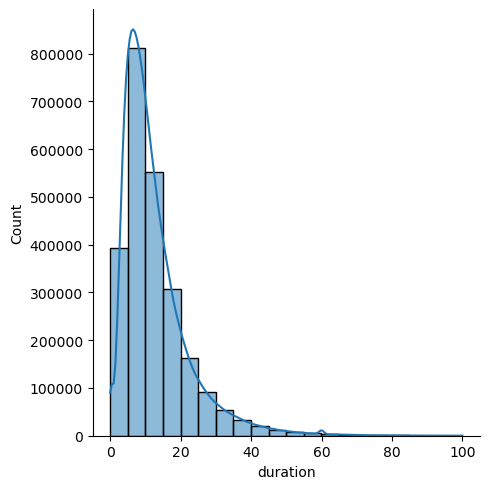

In [31]:
sns.displot(ytjan_df[ytjan_df.duration.between(0, 100)].duration, kde=True, bins=20)

In [32]:
ytjan_df.duration.describe()

count   2463931.00000
mean         14.21220
std          46.44530
min       -3442.40000
25%           6.32000
50%          10.18000
75%          16.17000
max        8513.18000
Name: duration, dtype: float64

In [33]:
ytjan_df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count   2463931.00000
mean         14.21220
std          46.44530
min       -3442.40000
50%          10.18000
95%          31.93000
98%          42.15000
99%          50.85000
max        8513.18000
Name: duration, dtype: float64

<Axes: >

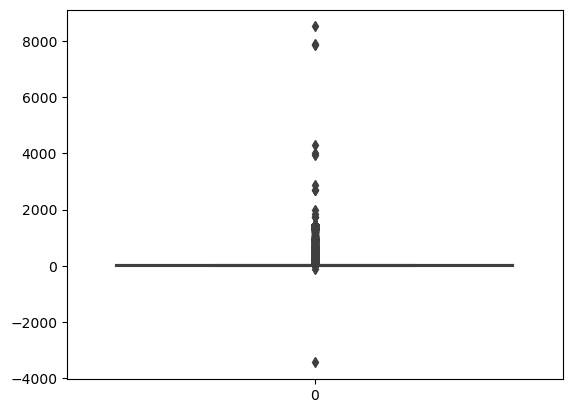

In [34]:
sns.boxplot(ytjan_df.duration)

In [104]:
ytjan_df[(ytjan_df.duration > 50.85000) & (ytjan_df.duration < 100)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
481,2,2022-01-01 00:15:34,2022-01-01 01:29:42,6.00000,16.21000,1.00000,N,161,134,1,60.50000,0.50000,0.50000,14.17000,6.55000,0.30000,85.02000,2.50000,0.00000,74.13000
865,1,2022-01-01 00:19:23,2022-01-01 01:14:47,1.00000,7.80000,1.00000,N,164,37,1,33.00000,3.00000,0.50000,9.20000,0.00000,0.30000,46.00000,2.50000,0.00000,55.40000
1489,1,2022-01-01 00:14:40,2022-01-01 01:13:17,1.00000,20.90000,2.00000,N,132,48,1,52.00000,3.75000,0.50000,15.75000,6.55000,0.30000,78.85000,2.50000,1.25000,58.62000
1947,2,2022-01-01 00:18:06,2022-01-01 01:13:47,1.00000,9.03000,1.00000,N,48,7,1,37.50000,0.50000,0.50000,10.32000,0.00000,0.30000,51.62000,2.50000,0.00000,55.68000
2747,1,2022-01-01 00:26:13,2022-01-01 01:23:13,1.00000,8.00000,1.00000,N,48,202,1,37.00000,3.00000,0.50000,12.20000,0.00000,0.30000,53.00000,2.50000,0.00000,57.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463428,2,2022-01-31 19:48:12,2022-01-31 20:41:30,NaN,10.54000,NaN,None,37,41,0,41.07000,0.00000,0.50000,5.00000,0.00000,0.30000,49.37000,NaN,NaN,53.30000
2463532,6,2022-01-31 20:01:41,2022-01-31 21:01:55,NaN,11.08000,NaN,None,265,69,0,43.20000,0.00000,0.50000,0.00000,0.00000,0.30000,44.00000,NaN,NaN,60.23000
2463557,6,2022-01-31 20:01:03,2022-01-31 21:01:59,NaN,7.63000,NaN,None,265,76,0,45.20000,0.00000,0.50000,0.00000,0.00000,0.30000,46.00000,NaN,NaN,60.93000
2463657,1,2022-01-31 21:19:28,2022-01-31 22:11:14,NaN,35.90000,NaN,None,132,1,0,111.00000,1.75000,0.00000,19.70000,18.30000,0.30000,151.05000,NaN,NaN,51.77000


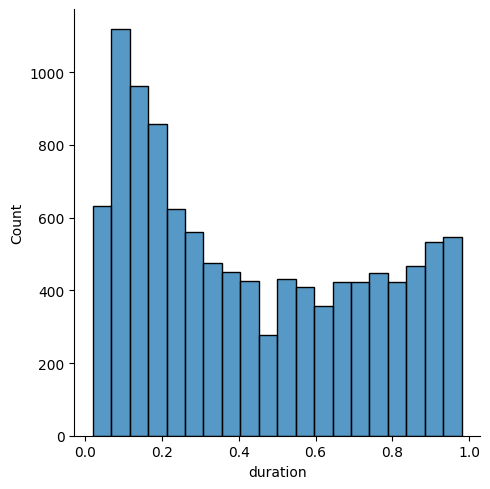

In [124]:
sns.displot(ytjan_df[(ytjan_df.duration > 0) & (ytjan_df.duration < 1)][ytjan_df.trip_distance != 0].duration)

In [132]:
ytjan_df[(ytjan_df.duration > 0) & (ytjan_df.duration < 1)][ytjan_df.trip_distance != 0].trip_distance.describe(percentiles=[0.90])

count   10846.00000
mean        1.45663
std         3.77774
min         0.01000
50%         0.11000
90%         4.45000
max        96.00000
Name: trip_distance, dtype: float64

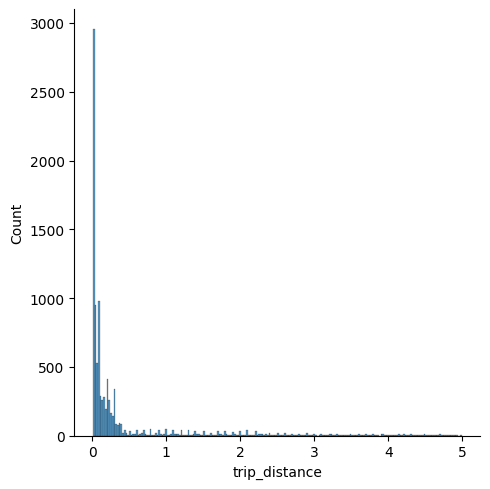

In [134]:
sns.displot(ytjan_df[(ytjan_df.duration > 0) & (ytjan_df.duration < 1)][(ytjan_df.trip_distance > 0) & (ytjan_df.trip_distance < 5)].trip_distance)

In [35]:
initial_rows = ytjan_df.shape[0]

In [34]:
ytjan_df = ytjan_df[(ytjan_df.duration.between(1, 60))]
after_rows = ytjan_df.shape[0]

In [39]:
print(f"{after_rows / initial_rows}%")

0.9827547930522406%


In [35]:
ytjan_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.00000,3.80000,1.00000,N,142,236,1,14.50000,3.00000,0.50000,3.65000,0.00000,0.30000,21.95000,2.50000,0.00000,17.82000
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.00000,2.10000,1.00000,N,236,42,1,8.00000,0.50000,0.50000,4.00000,0.00000,0.30000,13.30000,0.00000,0.00000,8.40000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.00000,0.97000,1.00000,N,166,166,1,7.50000,0.50000,0.50000,1.76000,0.00000,0.30000,10.56000,0.00000,0.00000,8.97000
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.00000,1.09000,1.00000,N,114,68,2,8.00000,0.50000,0.50000,0.00000,0.00000,0.30000,11.80000,2.50000,0.00000,10.03000
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.00000,4.30000,1.00000,N,68,163,1,23.50000,0.50000,0.50000,3.00000,0.00000,0.30000,30.30000,2.50000,0.00000,37.53000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32000,NaN,None,90,170,0,8.00000,0.00000,0.50000,2.39000,0.00000,0.30000,13.69000,NaN,NaN,5.97000
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19000,NaN,None,107,75,0,16.80000,0.00000,0.50000,4.35000,0.00000,0.30000,24.45000,NaN,NaN,10.65000
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10000,NaN,None,113,246,0,11.22000,0.00000,0.50000,2.00000,0.00000,0.30000,16.52000,NaN,NaN,11.00000
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92000,NaN,None,148,164,0,12.40000,0.00000,0.50000,0.00000,0.00000,0.30000,15.70000,NaN,NaN,12.05000


### Trip Distance Filter and Outlier

<Axes: >

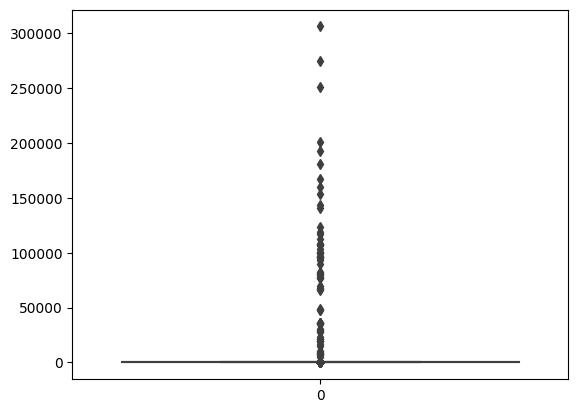

In [163]:
sns.boxplot(ytjan_df.trip_distance)

In [164]:
ytjan_df.trip_distance.describe(percentiles=[0.95, 0.97, 0.99])

count   1858180.00000
mean          6.79020
std         630.63484
min           1.01000
50%           2.21000
95%          14.36000
97%          17.80000
99%          20.01000
max      306159.28000
Name: trip_distance, dtype: float64

In [171]:
ytjan_df[ytjan_df.trip_distance < 2000].trip_distance.describe()

count   1858113.00000
mean          3.81783
std           4.48357
min           1.01000
25%           1.50000
50%           2.21000
75%           3.84000
max         651.00000
Name: trip_distance, dtype: float64

In [36]:
ytjan_df = ytjan_df[(ytjan_df.trip_distance < 652) & (ytjan_df.trip_distance >= 1)]

In [37]:
ytjan_df.duration.isnull().sum()

0

In [188]:
ytjan_df['PULocationID'].nunique()

254

In [189]:
ytjan_df['DOLocationID'].nunique()

261

In [38]:
ytjan_df['PULocationID'] = ytjan_df['PULocationID'].astype('str')
ytjan_df['DOLocationID'] = ytjan_df['DOLocationID'].astype('str')

In [68]:
train_dicts = ytjan_df[['PULocationID', 'DOLocationID', 'trip_distance']].to_dict(orient='records')

In [69]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [70]:
X_train.shape

(1896737, 516)

In [71]:
y_train = ytjan_df['duration'].values

In [72]:
y_train

array([17.82,  8.4 , 10.03, ..., 11.  , 12.05, 27.  ])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [8]:
## Full Jan NYC Transformation Dataset
ytjan_df = pd.read_parquet(D_PATH / 'yellow_tripdata_2022-01.parquet')

ytjan_df['duration'] = \
    (ytjan_df['tpep_dropoff_datetime'] - ytjan_df['tpep_pickup_datetime']) \
    .apply(lambda col: round(col.total_seconds() / 60, 2))

ytjan_df = ytjan_df[(ytjan_df.duration.between(1, 60))]
after_rows = ytjan_df.shape[0]


### Trip Distance Filter and Outlier

ytjan_df = ytjan_df[(ytjan_df.trip_distance < 652) & (ytjan_df.trip_distance >= 1)]

ytjan_df['PULocationID'] = ytjan_df['PULocationID'].astype('str')
ytjan_df['DOLocationID'] = ytjan_df['DOLocationID'].astype('str')

train_dicts = ytjan_df[['PULocationID', 'DOLocationID', 'trip_distance']].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

X_train.shape

y_train = ytjan_df['duration'].values

y_train

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [48]:
model = LinearRegression()

In [227]:
model.fit(X_train, y_train)

LinearRegression()

In [229]:
y_pred = model.predict(X_train)

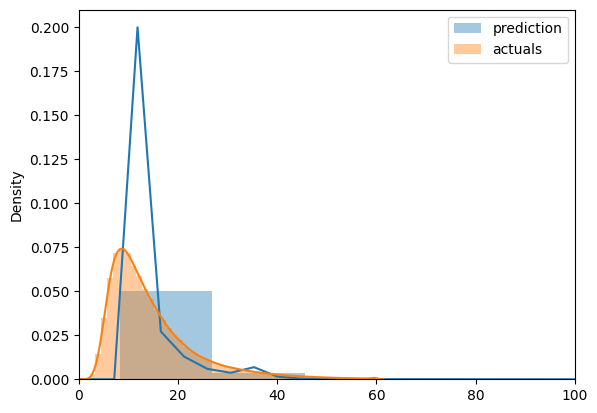

In [236]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actuals')
plt.xlim(0, 100)
plt.legend()

In [240]:
mean_squared_error(y_train, y_pred, squared=False)

5.766549051507733

In [259]:
ytjan_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.00000,3.80000,1.00000,N,142,236,1,14.50000,3.00000,0.50000,3.65000,0.00000,0.30000,21.95000,2.50000,0.00000,17.82000
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.00000,2.10000,1.00000,N,236,42,1,8.00000,0.50000,0.50000,4.00000,0.00000,0.30000,13.30000,0.00000,0.00000,8.40000
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.00000,1.09000,1.00000,N,114,68,2,8.00000,0.50000,0.50000,0.00000,0.00000,0.30000,11.80000,2.50000,0.00000,10.03000
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.00000,4.30000,1.00000,N,68,163,1,23.50000,0.50000,0.50000,3.00000,0.00000,0.30000,30.30000,2.50000,0.00000,37.53000
5,1,2022-01-01 00:40:15,2022-01-01 01:09:48,1.00000,10.30000,1.00000,N,138,161,1,33.00000,3.00000,0.50000,13.00000,6.55000,0.30000,56.35000,2.50000,0.00000,29.55000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32000,NaN,None,90,170,0,8.00000,0.00000,0.50000,2.39000,0.00000,0.30000,13.69000,NaN,NaN,5.97000
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19000,NaN,None,107,75,0,16.80000,0.00000,0.50000,4.35000,0.00000,0.30000,24.45000,NaN,NaN,10.65000
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10000,NaN,None,113,246,0,11.22000,0.00000,0.50000,2.00000,0.00000,0.30000,16.52000,NaN,NaN,11.00000
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92000,NaN,None,148,164,0,12.40000,0.00000,0.50000,0.00000,0.00000,0.30000,15.70000,NaN,NaN,12.05000


In [53]:
ytfev_df = pd.read_parquet(D_PATH / 'yellow_tripdata_2022-02.parquet')

In [54]:
ytfev_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.00000,5.40000,1.00000,N,138,252,1,17.00000,1.75000,0.50000,3.90000,0.00000,0.30000,23.45000,0.00000,1.25000
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.00000,6.40000,1.00000,N,138,41,2,21.00000,1.75000,0.50000,0.00000,6.55000,0.30000,30.10000,0.00000,1.25000
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.00000,12.50000,1.00000,N,138,200,2,35.50000,1.75000,0.50000,0.00000,6.55000,0.30000,44.60000,0.00000,1.25000
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.00000,9.88000,1.00000,N,239,200,2,28.00000,0.50000,0.50000,0.00000,3.00000,0.30000,34.80000,2.50000,0.00000
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.00000,12.16000,1.00000,N,138,125,1,35.50000,0.50000,0.50000,8.11000,0.00000,0.30000,48.66000,2.50000,1.25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979426,2,2022-02-28 23:50:00,2022-03-01 00:06:00,NaN,3.40000,NaN,None,163,193,0,14.37000,0.00000,0.50000,0.00000,0.00000,0.30000,17.67000,NaN,NaN
2979427,2,2022-02-28 23:06:57,2022-02-28 23:19:12,NaN,3.48000,NaN,None,141,4,0,14.51000,0.00000,0.50000,2.00000,0.00000,0.30000,19.81000,NaN,NaN
2979428,2,2022-02-28 23:48:13,2022-03-01 00:03:33,NaN,3.05000,NaN,None,161,151,0,14.38000,0.00000,0.50000,3.81000,0.00000,0.30000,21.49000,NaN,NaN
2979429,2,2022-02-28 23:56:41,2022-03-01 00:04:57,NaN,2.62000,NaN,None,141,226,0,12.53000,0.00000,0.50000,1.71000,0.00000,0.30000,17.54000,NaN,NaN


In [55]:
ytfev_df['duration'] = \
    (ytfev_df['tpep_dropoff_datetime'] - ytfev_df['tpep_pickup_datetime']) \
    .apply(lambda col: round(col.total_seconds() / 60, 2))

In [56]:
ytfev_df = ytfev_df[(ytfev_df.duration.between(1,60))]

In [57]:
ytfev_df = ytfev_df[(ytfev_df.trip_distance < 652) & (ytfev_df.trip_distance >= 1)]

In [58]:
ytfev_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.00000,5.40000,1.00000,N,138,252,1,17.00000,1.75000,0.50000,3.90000,0.00000,0.30000,23.45000,0.00000,1.25000,12.43000
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.00000,6.40000,1.00000,N,138,41,2,21.00000,1.75000,0.50000,0.00000,6.55000,0.30000,30.10000,0.00000,1.25000,17.55000
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.00000,12.50000,1.00000,N,138,200,2,35.50000,1.75000,0.50000,0.00000,6.55000,0.30000,44.60000,0.00000,1.25000,23.65000
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.00000,9.88000,1.00000,N,239,200,2,28.00000,0.50000,0.50000,0.00000,3.00000,0.30000,34.80000,2.50000,0.00000,20.08000
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.00000,12.16000,1.00000,N,138,125,1,35.50000,0.50000,0.50000,8.11000,0.00000,0.30000,48.66000,2.50000,1.25000,26.32000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979426,2,2022-02-28 23:50:00,2022-03-01 00:06:00,NaN,3.40000,NaN,None,163,193,0,14.37000,0.00000,0.50000,0.00000,0.00000,0.30000,17.67000,NaN,NaN,16.00000
2979427,2,2022-02-28 23:06:57,2022-02-28 23:19:12,NaN,3.48000,NaN,None,141,4,0,14.51000,0.00000,0.50000,2.00000,0.00000,0.30000,19.81000,NaN,NaN,12.25000
2979428,2,2022-02-28 23:48:13,2022-03-01 00:03:33,NaN,3.05000,NaN,None,161,151,0,14.38000,0.00000,0.50000,3.81000,0.00000,0.30000,21.49000,NaN,NaN,15.33000
2979429,2,2022-02-28 23:56:41,2022-03-01 00:04:57,NaN,2.62000,NaN,None,141,226,0,12.53000,0.00000,0.50000,1.71000,0.00000,0.30000,17.54000,NaN,NaN,8.27000


In [59]:
ytfev_df['PULocationID'] = ytfev_df['PULocationID'].astype('str')
ytfev_df['DOLocationID'] = ytfev_df['DOLocationID'].astype('str')

In [60]:
train_dicts = ytfev_df[['PULocationID', 'DOLocationID', 'trip_distance']].to_dict(orient='records')

In [61]:
ytfev_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-02-01 00:06:58,2022-02-01 00:19:24,1.00000,5.40000,1.00000,N,138,252,1,17.00000,1.75000,0.50000,3.90000,0.00000,0.30000,23.45000,0.00000,1.25000,12.43000
1,1,2022-02-01 00:38:22,2022-02-01 00:55:55,1.00000,6.40000,1.00000,N,138,41,2,21.00000,1.75000,0.50000,0.00000,6.55000,0.30000,30.10000,0.00000,1.25000,17.55000
2,1,2022-02-01 00:03:20,2022-02-01 00:26:59,1.00000,12.50000,1.00000,N,138,200,2,35.50000,1.75000,0.50000,0.00000,6.55000,0.30000,44.60000,0.00000,1.25000,23.65000
3,2,2022-02-01 00:08:00,2022-02-01 00:28:05,1.00000,9.88000,1.00000,N,239,200,2,28.00000,0.50000,0.50000,0.00000,3.00000,0.30000,34.80000,2.50000,0.00000,20.08000
4,2,2022-02-01 00:06:48,2022-02-01 00:33:07,1.00000,12.16000,1.00000,N,138,125,1,35.50000,0.50000,0.50000,8.11000,0.00000,0.30000,48.66000,2.50000,1.25000,26.32000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979426,2,2022-02-28 23:50:00,2022-03-01 00:06:00,NaN,3.40000,NaN,None,163,193,0,14.37000,0.00000,0.50000,0.00000,0.00000,0.30000,17.67000,NaN,NaN,16.00000
2979427,2,2022-02-28 23:06:57,2022-02-28 23:19:12,NaN,3.48000,NaN,None,141,4,0,14.51000,0.00000,0.50000,2.00000,0.00000,0.30000,19.81000,NaN,NaN,12.25000
2979428,2,2022-02-28 23:48:13,2022-03-01 00:03:33,NaN,3.05000,NaN,None,161,151,0,14.38000,0.00000,0.50000,3.81000,0.00000,0.30000,21.49000,NaN,NaN,15.33000
2979429,2,2022-02-28 23:56:41,2022-03-01 00:04:57,NaN,2.62000,NaN,None,141,226,0,12.53000,0.00000,0.50000,1.71000,0.00000,0.30000,17.54000,NaN,NaN,8.27000


In [62]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [63]:
y_train = ytfev_df['duration'].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [251]:
model = LinearRegression()

In [252]:
model.fit(X_train, y_train)

LinearRegression()

In [253]:
y_pred = model.predict(X_train)

In [254]:
mean_squared_error(y_train, y_pred, squared=False)

5.691426190735266

# MLFlow Tracking Experiment - MODULE 2

### LinearRegression 

In [49]:
model = LinearRegression()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [101]:
with mlflow.start_run():
    mlflow.set_tag("developer", "leonardo")

    mlflow.log_param(
        "train-data-path", 
        (D_PATH / 'yellow_tripdata_2022-01.parquet').as_posix()
    )
    alpha = 0.05
    mlflow.log_param("alpha", alpha)
    model = Lasso(alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mlflow.log_metric("rmse", rmse)

### Xgboost

In [9]:
X_train

<1327715x516 sparse matrix of type '<class 'numpy.float64'>'
	with 3983145 stored elements in Compressed Sparse Row format>

In [10]:
X_train

<1327715x516 sparse matrix of type '<class 'numpy.float64'>'
	with 3983145 stored elements in Compressed Sparse Row format>

In [11]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_test, label=y_test)

In [80]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, "validation")],
            early_stopping_rounds=50,
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [81]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42,
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials()
)

[17:35:29] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.                                                                                                                                                                                                                                
[0]	validation-rmse:10.86893                                                                                                                                                                                                                                                                                                                                                               
[1]	validation-rmse:8.09501                                                                                                                                                                                                                     

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [12]:
best_metrics = load(D_PATH / "best_metrics_xgb_nyc_exp.csv")

In [13]:
best_params = dict(zip(best_metrics['Name'],best_metrics['Value']))

In [14]:
best_params

{'learning_rate': '0.365070765653183',
 'max_depth': '9',
 'min_child_weight': '6.80864659339626',
 'objective': 'reg:linear',
 'reg_alpha': '0.241236510432031',
 'reg_lambda': '0.0630446054918118',
 'seed': '42'}

In [15]:
mlflow.xgboost.autolog()

booster = xgb.train(
    params=best_params,
    dtrain=train,
    num_boost_round=1000,
    evals=[(valid, "validation")],
    early_stopping_rounds=50,
)

2023/05/22 17:05:30 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'aea0f4e2839d4f399cc4c3815f3e74ba', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow


[17:05:30] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation-rmse:11.30269
[1]	validation-rmse:8.06843
[2]	validation-rmse:6.30290
[3]	validation-rmse:5.41634
[4]	validation-rmse:4.99773
[5]	validation-rmse:4.81160
[6]	validation-rmse:4.71818
[7]	validation-rmse:4.67462
[8]	validation-rmse:4.64999
[9]	validation-rmse:4.63439
[10]	validation-rmse:4.62452
[11]	validation-rmse:4.61631
[12]	validation-rmse:4.61190
[13]	validation-rmse:4.60749
[14]	validation-rmse:4.60228
[15]	validation-rmse:4.59700
[16]	validation-rmse:4.59026
[17]	validation-rmse:4.58501
[18]	validation-rmse:4.57354
[19]	validation-rmse:4.56870
[20]	validation-rmse:4.56560
[21]	validation-rmse:4.56241
[22]	validation-rmse:4.55960
[23]	validation-rmse:4.55569
[24]	validation-rmse:4.55212
[25]	validation-rmse:4.55064
[26]	validation-rmse:4.54860
[27]	validation-rmse:4.54289
[28]	validation-rmse:4.54114
[29]	validat

2023/05/22 17:06:29 WARNING mlflow.xgboost: Failed to infer model signature: could not sample data to infer model signature: please ensure that autologging is enabled before constructing the dataset.


In [74]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_test, label=y_test)

In [18]:
mlflow.xgboost.autolog(disable=True)

In [19]:
with mlflow.start_run():
    
    mlflow.log_params(best_params)
    mlflow.log_param(
        "train-data-path", 
        (D_PATH / 'yellow_tripdata_2022-01.parquet').as_posix()
    )
    mlflow.set_tag("developer", "leonardo")

    booster = xgb.train(
        params=best_params,
        dtrain=train,
        num_boost_round=1000,
        evals=[(valid, "validation")],
        early_stopping_rounds=50,
    )
    y_pred = booster.predict(valid)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mlflow.log_metric("rmse", rmse)
    # Save Preprocessor
    save(dv, M_PATH / "preprocessor.pkl")
    mlflow.log_artifact((M_PATH / "preprocessor.pkl").as_posix(), artifact_path="preprocessor")
    
    mlflow.xgboost.log_model(booster, artifact_path="models_mlflow")

[17:19:22] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation-rmse:11.30269
[1]	validation-rmse:8.06843
[2]	validation-rmse:6.30290
[3]	validation-rmse:5.41634
[4]	validation-rmse:4.99773
[5]	validation-rmse:4.81160
[6]	validation-rmse:4.71818
[7]	validation-rmse:4.67462
[8]	validation-rmse:4.64999
[9]	validation-rmse:4.63439
[10]	validation-rmse:4.62452
[11]	validation-rmse:4.61631
[12]	validation-rmse:4.61190
[13]	validation-rmse:4.60749
[14]	validation-rmse:4.60228
[15]	validation-rmse:4.59700
[16]	validation-rmse:4.59026
[17]	validation-rmse:4.58501
[18]	validation-rmse:4.57354
[19]	validation-rmse:4.56870
[20]	validation-rmse:4.56560
[21]	validation-rmse:4.56241
[22]	validation-rmse:4.55960
[23]	validation-rmse:4.55569
[24]	validation-rmse:4.55212
[25]	validation-rmse:4.55064
[26]	validation-rmse:4.54860
[27]	validation-rmse:4.54289
[28]	validation-rmse:4.54114
[29]	validat

In [24]:
mlflow.b

<RunInfo: artifact_uri='/home/leobit/Development/mlopszoomcamp/notebook/mlruns/1/a930518ac1fe4659846b593cf3824db2/artifacts', end_time=1684786819973, experiment_id='1', lifecycle_stage='active', run_id='a930518ac1fe4659846b593cf3824db2', run_name='sincere-squid-515', run_uuid='a930518ac1fe4659846b593cf3824db2', start_time=1684786762976, status='FINISHED', user_id='leobit'>

In [27]:
logged_model = 'runs:/a930518ac1fe4659846b593cf3824db2/models_mlflow'

# Load model as a PyFuncModel
loaded_model = mlflow.pyfunc.load_model(logged_model)

[17:40:23] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [28]:
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: models_mlflow
  flavor: mlflow.xgboost
  run_id: a930518ac1fe4659846b593cf3824db2

In [29]:
xgboost_model = mlflow.xgboost.load_model(logged_model)

[17:41:41] WARNING: /croot/xgboost-split_1675457761144/work/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [31]:
y_pred = xgboost_model.predict(valid)

In [32]:
y_pred

array([ 7.1126227, 12.348577 , 20.936316 , ..., 11.316815 , 13.841831 ,
       13.173948 ], dtype=float32)

In [19]:
from mlflow.tracking import MlflowClient

MLFLOW_TRACKING_URI = MLFLOW_SQL_PATH
client = MlflowClient(tracking_uri=MLFLOW_TRACKING_URI)

In [35]:
client.create_experiment(name="nyc-taxi-green")

'2'

In [25]:
runs = client.search_runs(
    experiment_ids='1',
    filter_string="metrics.rmse < 5",
    run_view_type=mlflow.entities.ViewType.ACTIVE_ONLY,
    max_results=5,
    order_by=["metrics.rsme ASC"]
)

In [26]:
for run in runs:
    print(f"rund id: {run.info.run_id}, rmse: {run.data.metrics['rmse']:.4f}")

rund id: a930518ac1fe4659846b593cf3824db2, rmse: 4.3649
rund id: 949ff5f6cad049248f582293187e6a23, rmse: 4.3649
rund id: 6335db3af7ac43b7b7221d026ea0de2b, rmse: 4.3449
rund id: 2b4e77511b044238936f3801ad0d9c5d, rmse: 4.1812
rund id: 3741948f302b42a9b75f589f1f370cdc, rmse: 4.1431


In [27]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)


In [30]:
run_id = "a930518ac1fe4659846b593cf3824db2"
model_uri = f"runs:/{run_id}/model"
mlflow.register_model(model_uri=model_uri, name='nyc-taxi-regressor')

Registered model 'nyc-taxi-regressor' already exists. Creating a new version of this model...
2023/05/22 22:14:44 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: nyc-taxi-regressor, version 3
Created version '3' of model 'nyc-taxi-regressor'.


<ModelVersion: aliases=[], creation_timestamp=1684804484986, current_stage='None', description=None, last_updated_timestamp=1684804484986, name='nyc-taxi-regressor', run_id='a930518ac1fe4659846b593cf3824db2', run_link=None, source='/home/leobit/Development/mlopszoomcamp/notebook/mlruns/1/a930518ac1fe4659846b593cf3824db2/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=3>

In [34]:
client.search_registered_models()

[<RegisteredModel: aliases={}, creation_timestamp=1684798478859, description='', last_updated_timestamp=1684804484986, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1684798508587, current_stage='Staging', description='feat: new version of the regressor', last_updated_timestamp=1684798870006, name='nyc-taxi-regressor', run_id='949ff5f6cad049248f582293187e6a23', run_link='', source='/home/leobit/Development/mlopszoomcamp/notebook/mlruns/1/949ff5f6cad049248f582293187e6a23/artifacts/models_mlflow', status='READY', status_message=None, tags={'model': 'gradientboostingregressorv2'}, user_id=None, version=2>,
  <ModelVersion: aliases=[], creation_timestamp=1684804484986, current_stage='None', description=None, last_updated_timestamp=1684804484986, name='nyc-taxi-regressor', run_id='a930518ac1fe4659846b593cf3824db2', run_link=None, source='/home/leobit/Development/mlopszoomcamp/notebook/mlruns/1/a930518ac1fe4659846b593cf3824db2/artifacts/model', status='READY', status_message=

In [35]:
model_name = "nyc-taxi-regressor"

lastest_versions = client.get_latest_versions(name=model_name)

for version in lastest_versions:
    print(f"version : {version.version}, stage: {version.current_stage}")

version : 2, stage: Staging
version : 3, stage: None


In [36]:
client.transition_model_version_stage(
    name=model_name,
    version=3,
    stage="Production",
    archive_existing_versions=False
    
)

<ModelVersion: aliases=[], creation_timestamp=1684804484986, current_stage='Production', description=None, last_updated_timestamp=1684805076960, name='nyc-taxi-regressor', run_id='a930518ac1fe4659846b593cf3824db2', run_link=None, source='/home/leobit/Development/mlopszoomcamp/notebook/mlruns/1/a930518ac1fe4659846b593cf3824db2/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=3>

In [37]:
model_name = "nyc-taxi-regressor"

lastest_versions = client.get_latest_versions(name=model_name)

for version in lastest_versions:
    print(f"version : {version.version}, stage: {version.current_stage}")

version : 2, stage: Staging
version : 3, stage: Production


### 2nd Homework (Experiment Tracking)

In [ ]:
import re
import time
import random
import warnings
import mlflow
import pandas as pd
import pickle as pkl
import pandas as pd
import numpy as np
import multiprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from subprocess import Popen, PIPE, STDOUT
from mlflow.tracking import MlflowClient

from experiment_tracking.preprocess_data import run_data_prep
from experiment_tracking.train import run_train
from experiment_tracking.hpo import run_optimization
from experiment_tracking.register_model import run_register_model

In [10]:
mlflow.__version__

'2.3.1'

In [45]:
!wget -O {(D_PATH / 'raw' / 'green_tripdata_2022-01.parquet')} https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet
!wget -O {(D_PATH / 'raw' / 'green_tripdata_2022-02.parquet')} https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet
!wget -O {(D_PATH / 'raw' / 'green_tripdata_2022-03.parquet')} https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet

--2023-05-22 22:54:00--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 2600:9000:200c:1200:b:20a5:b140:21, 2600:9000:200c:6600:b:20a5:b140:21, 2600:9000:200c:1400:b:20a5:b140:21, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|2600:9000:200c:1200:b:20a5:b140:21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1254291 (1,2M) [binary/octet-stream]
Saving to: ‘/home/leobit/Development/mlopszoomcamp/data/raw/green_tripdata_2022-01.parquet’

/home/leobit/Develo 100%[===================>]   1,20M  1,53MB/s    in 0,8s    

2023-05-22 22:54:01 (1,53 MB/s) - ‘/home/leobit/Development/mlopszoomcamp/data/raw/green_tripdata_2022-01.parquet’ saved [1254291/1254291]

--2023-05-22 22:54:01--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.ne

In [12]:
raw_data_path = (D_PATH / 'raw').as_posix()
dest_path = (D_PATH / 'transformed').as_posix()

In [52]:
run_data_prep(raw_data_path=raw_data_path, dest_path=dest_path)

In [61]:
print(f"{(D_PATH / 'transformed' / 'dv.pkl').stat().st_size / 1024} KB")

150.05859375 KB


In [9]:
# MLFLow Experiment Set
mlflow.set_tracking_uri(MLFLOW_SQL_PATH)
mlflow.set_experiment("nyc-taxi-green")

<Experiment: artifact_location='/home/leobit/Development/mlopszoomcamp/notebook/mlruns/2', creation_time=1684799031786, experiment_id='2', last_update_time=1684799031786, lifecycle_stage='active', name='nyc-taxi-green', tags={}>

In [69]:
mlflow.sklearn.autolog()
with mlflow.start_run():
    run_train(dest_path)

In [20]:
MLFLOW_TRACKING_URI = MLFLOW_SQL_PATH
client = MlflowClient(tracking_uri=MLFLOW_TRACKING_URI)

In [71]:
runs = client.search_runs(
    experiment_ids='2',
    run_view_type=mlflow.entities.ViewType.ACTIVE_ONLY,
    max_results=5,
)

In [82]:
runs[-1].data.params.get('max_depth')

'10'

In [26]:
run_optimization(dest_path, num_trials=10)

[I 2023-05-22 23:47:37,341] A new study created in memory with name: no-name-eba40d7d-2e97-4829-b222-8ad1115d1aef
[I 2023-05-22 23:47:37,691] Trial 0 finished with value: 2.451379690825458 and parameters: {'n_estimators': 25, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 2.451379690825458.
[I 2023-05-22 23:47:37,762] Trial 1 finished with value: 2.4667366020368333 and parameters: {'n_estimators': 16, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 2.451379690825458.
[I 2023-05-22 23:47:38,072] Trial 2 finished with value: 2.449827329704216 and parameters: {'n_estimators': 34, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 2 with value: 2.449827329704216.
[I 2023-05-22 23:47:38,197] Trial 3 finished with value: 2.460983516558473 and parameters: {'n_estimators': 44, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 2 with value: 2.44982732

In [47]:
runs = client.search_runs(
    experiment_ids='3',
    run_view_type=mlflow.entities.ViewType.ACTIVE_ONLY,
    order_by=["metrics.rmse"]
)

In [49]:
runs[0].data.metrics.get('rmse')

2.449827329704216

In [66]:
run_register_model(dest_path, 5)

Registered model 'nyc-taxi-green-regressor' already exists. Creating a new version of this model...
2023/05/23 00:16:23 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: nyc-taxi-green-regressor, version 3
Created version '3' of model 'nyc-taxi-green-regressor'.


In [67]:
experiment = client.get_experiment_by_name("random-forest-best-models")
runs = client.search_runs(
    experiment_ids=experiment.experiment_id,
    run_view_type=mlflow.entities.ViewType.ACTIVE_ONLY,
    order_by=["metrics.test_rmse ASC"]
)

In [68]:
runs[0].data.metrics.get("test_rmse")

2.2854691906481364